In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict/WorldHappinessV2.csv
/kaggle/input/world-happiness-report/2015.csv
/kaggle/input/world-happiness-report/2017.csv
/kaggle/input/world-happiness-report/2019.csv
/kaggle/input/world-happiness-report/2020.csv
/kaggle/input/world-happiness-report/2018.csv
/kaggle/input/world-happiness-report/2016.csv


In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from seaborn import heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import plotly.express as px
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import KFold

from subprocess import check_output
import seaborn as sns




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



**Data processing:**

In [63]:
df_2020=pd.read_csv('../input/world-happiness-report/2020.csv')
df_2019=pd.read_csv('../input/world-happiness-report/2019.csv')
df_2018=pd.read_csv('../input/world-happiness-report/2018.csv')
df_2017=pd.read_csv('../input/world-happiness-report/2017.csv')
df_2016=pd.read_csv('../input/world-happiness-report/2016.csv')
df_2015=pd.read_csv('../input/world-happiness-report/2015.csv')
df_WorldHappinessV2=pd.read_csv('../input/predict/WorldHappinessV2.csv')
# pick up common features and rename

# print(df_2015.columns)
# print(df_2016.columns)
# print(df_2017.columns)
# print(df_2018.columns)
# print(df_2019.columns)
print(df_2020.columns)
print(df_WorldHappinessV2.columns)

#df_2017 = df_2017.rename(columns = {'Happiness.Score' : 'Happiness Score', 'Happiness.Rank' : 'Happiness Rank', 'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)','Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual' : 'Dystopia Residual'})
#df_2018 = df_2018.rename(columns = {'Healthy life expectancy' : 'Health (Life Expectancy)', 'Social support' : 'Family', 'Score' : 'Happiness Score', 'Country or region':'Country', 'Overall rank' : 'Happiness Rank', 'GDP per capita' : 'Economy (GDP per Capita)', 'Perceptions of corruption' : 'Trust (Government Corruption)'})
#df_2019 = df_2019.rename(columns = {'Freedom to make life choices' : 'Freedom', 'Score' : 'Happiness Score', 'Country or region':'Country', 'Overall rank' : 'Happiness Rank', 'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family','Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'Trust (Government Corruption)'})
df_2020 = df_2020.rename(columns = {'Ladder score' : 'Happiness Score', 'Country name':'Country', 'Regional indicator':'Region', 'Explained by: Log GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family', 'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'Trust (Government Corruption)'})
#df_2015.drop(["Happiness Rank", "Region", "Standard Error", "Dystopia Residual"], inplace = True, axis = 1)
#df_2016.drop(["Dystopia Residual", "Happiness Rank", "Region", "Lower Confidence Interval", "Upper Confidence Interval"], inplace = True, axis = 1)
#df_2017.drop(["Happiness Rank", "Dystopia Residual", "Whisker.low", "Whisker.high"], inplace = True, axis = 1)
#df_2018.drop(["Freedom to make life choices", "Happiness Rank"], inplace = True, axis = 1)
#df_2019.drop("Happiness Rank", inplace = True, axis = 1)
df_2020.drop(["Logged GDP per capita", "Region", "Standard error of ladder score", "upperwhisker", "lowerwhisker", "Ladder score in Dystopia", "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity", "Explained by: Perceptions of corruption", "Dystopia + residual"], inplace = True, axis = 1)
#df_2015['year'] = 2015
#df_2016['year'] = 2016
#df_2017['year'] = 2017
#df_2018['year'] = 2018
#df_2019['year'] = 2019
df_2020['year'] = 2020





df_all = pd.concat([df_WorldHappinessV2])
# fill null values with mean
df_all.fillna((df_all.mean()), inplace = True)
print(df_all.info())
df_WorldHappinessV2.head()
# print(df_all)



Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')
Index(['Year', 'Country', 'Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 10 columns):
 #   Column                      

,Year,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Switzerland,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517
1,2015,Iceland,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702
2,2015,Denmark,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492
3,2015,Norway,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465
4,2015,Canada,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452


**Data Overview**

In [64]:

print(df_WorldHappinessV2.head())
print(df_WorldHappinessV2.shape)
print(df_WorldHappinessV2.columns)

print(df_2020.head())
print(df_2020.shape)
print(df_2020.columns)




   Year      Country  Happiness Score  Economy (GDP per Capita)  Family  \
0  2015  Switzerland            7.587                     1.397   1.350   
1  2015      Iceland            7.561                     1.302   1.402   
2  2015      Denmark            7.527                     1.325   1.361   
3  2015       Norway            7.522                     1.459   1.331   
4  2015       Canada            7.427                     1.326   1.323   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.941    0.666                          0.420   
1                     0.948    0.629                          0.141   
2                     0.875    0.649                          0.484   
3                     0.885    0.670                          0.365   
4                     0.906    0.633                          0.330   

   Generosity  Dystopia Residual  
0       0.297              2.517  
1       0.436              2.702  
2       0.341    

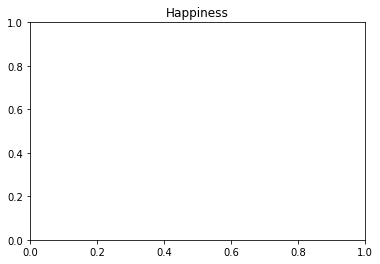

In [50]:
df_WorldHappinessV2[['Happiness Score']]
plt.title("Happiness")
plt.show()


KNN

Constant MSE: 1.45


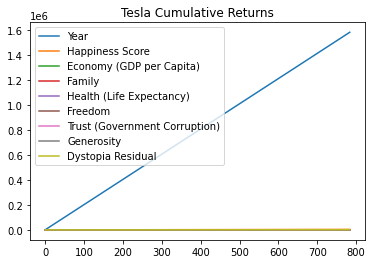

In [51]:
# Comulative Return
dr = df_WorldHappinessV2.cumsum()

dr.plot()
plt.title('Tesla Cumulative Returns')
y = df_all['Happiness Score']
X = df_all[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 
          'Trust (Government Corruption)']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
constant_mse = mean_squared_error(np.ones(y_test.shape) * np.mean(y_train), y_test)
print("Constant MSE: %.2f" % constant_mse)

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

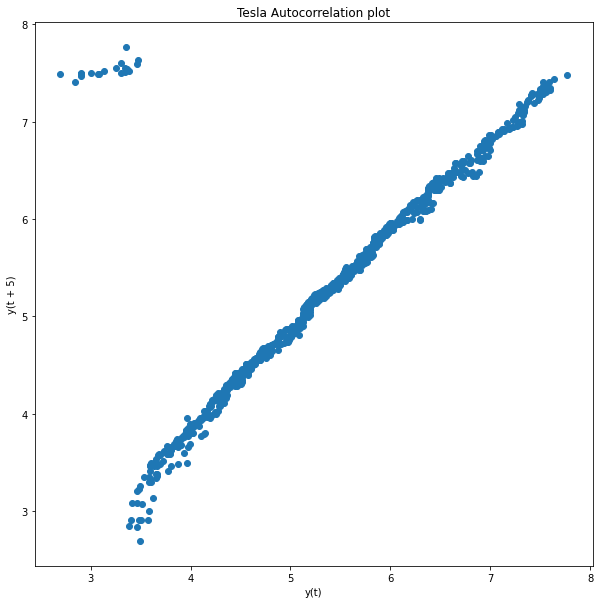

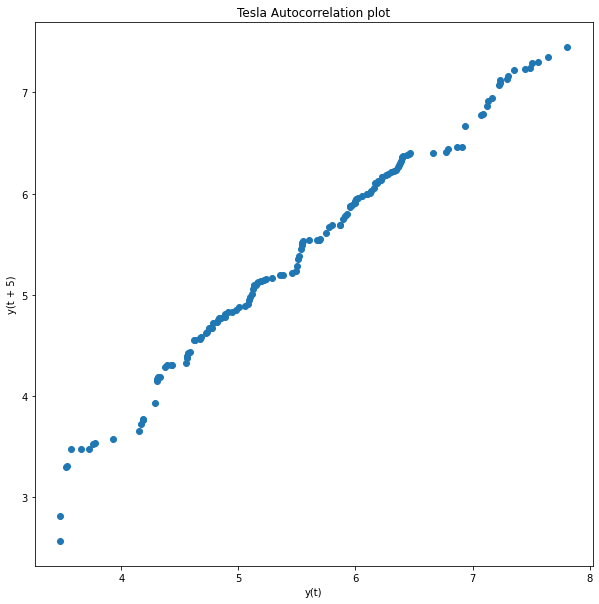

In [65]:
from sklearn.neighbors import KNeighborsRegressor
plt.figure(figsize=(10,10))
lag_plot(df_WorldHappinessV2['Happiness Score'], lag=5)
plt.title('Tesla Autocorrelation plot')
from sklearn.neighbors import KNeighborsRegressor
plt.figure(figsize=(10,10))
lag_plot(df_2020['Happiness Score'], lag=5)
plt.title('Tesla Autocorrelation plot')


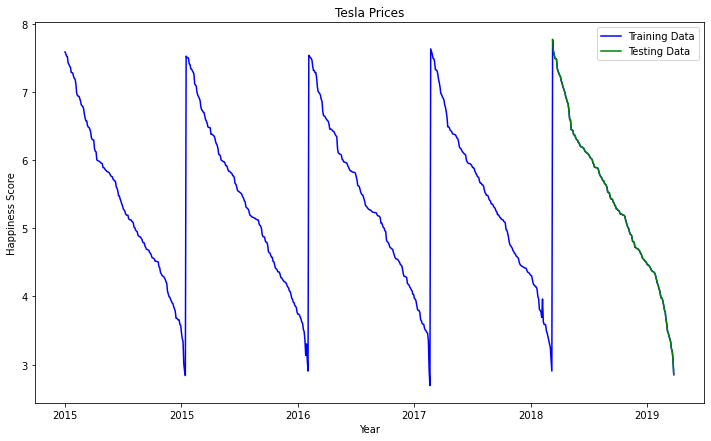

In [75]:
df_WorldHappinessV2['Year']
train_data, test_data = df_WorldHappinessV2[0:int(len(df_WorldHappinessV2)*0.8)], df_WorldHappinessV2[int(len(df_WorldHappinessV2)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.plot(df_WorldHappinessV2['Happiness Score'], 'blue', label='Training Data')
plt.plot(test_data['Happiness Score'], 'green', label='Testing Data')
plt.xticks(np.arange(0,784, 150), df_WorldHappinessV2['Year'][0:784:150])
plt.legend()

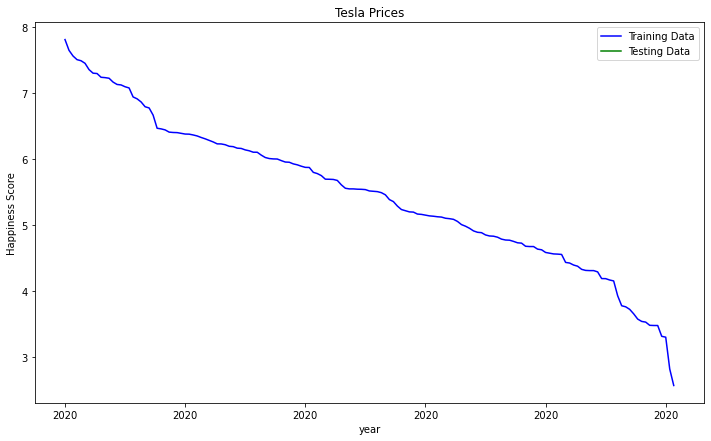

In [70]:
df_2020['year']
train_data, test_data = df_2020[0:int(len(df_WorldHappinessV2)*0.8)], df_2020[int(len(df_WorldHappinessV2)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('year')
plt.ylabel('Happiness Score')
plt.plot(df_2020['Happiness Score'], 'blue', label='Training Data')
plt.plot(test_data['Happiness Score'], 'green', label='Testing Data')
plt.xticks(np.arange(0,154, 30), df_2020['year'][0:154:30])
plt.legend()

In [76]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [77]:
train_ar = train_data['Happiness Score'].values
test_ar = test_data['Happiness Score'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




Testing Mean Squared Error: 0.153
Symmetric mean absolute percentage error: 23.844


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.



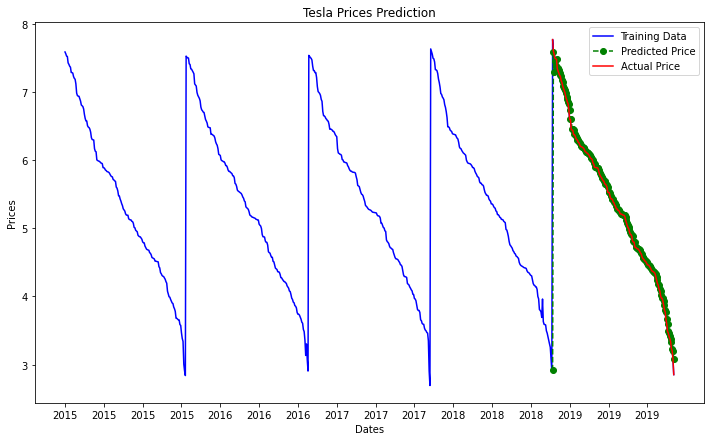

In [78]:
plt.figure(figsize=(12,7))
plt.plot(df_WorldHappinessV2['Happiness Score'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Happiness Score'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,784,50), df_WorldHappinessV2['Year'][0:784:50])
plt.legend()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.



ValueError: The number of FixedLocator locations (16), usually from a call to set_ticks, does not match the number of ticklabels (4).

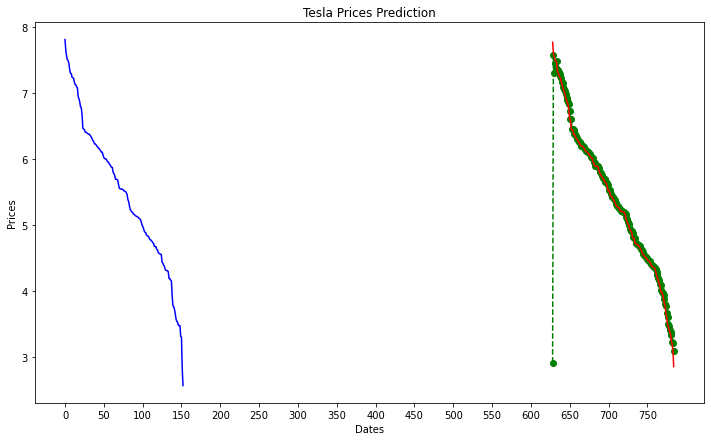

In [79]:
plt.figure(figsize=(12,7))
plt.plot(df_2020['Happiness Score'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Happiness Score'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,784,50), df_2020['year'][0:784:50])
plt.legend()

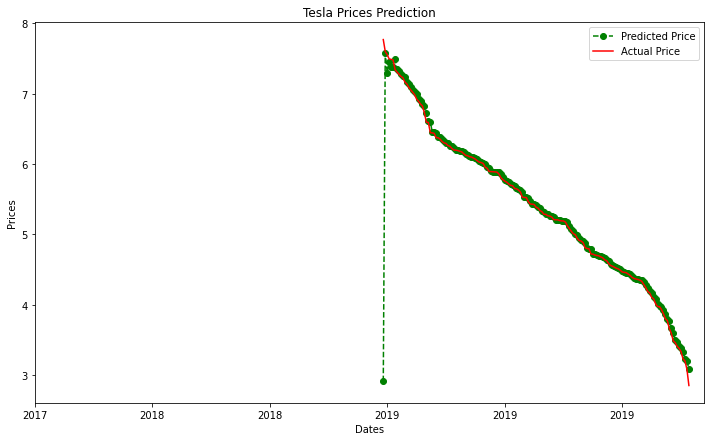

In [59]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Happiness Score'], color='red', label='Actual Price')
plt.xticks(np.arange(450,784, 60), df_WorldHappinessV2['Year'][450:784:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**linear regression**

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
# score = lm.score(X_test, y_test)
score = r2_score(y_test, y_pred)
# score = r2_score(y_pred, y_test)
mse = mean_squared_error(y_test, y_pred)
score, mse





(0.7781337020000619, 0.2750698630113735)

In [13]:
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
y_pred_train = dtr.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train)
# d=dtr.score(X_test, y_test)
score = r2_score(y_test, y_pred)
score, test_mse 

(0.6309197548128552, 0.4575857324840764)

In [14]:
rf = RandomForestRegressor(n_estimators = 13579)
rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)
errors = abs(y_hat - y_test)
acc = 1 - errors
# c=rf.score(X_test, y_test)
score = r2_score(y_test, y_pred)
score, np.mean(acc)

(0.6309197548128552, 0.6379331695673305)